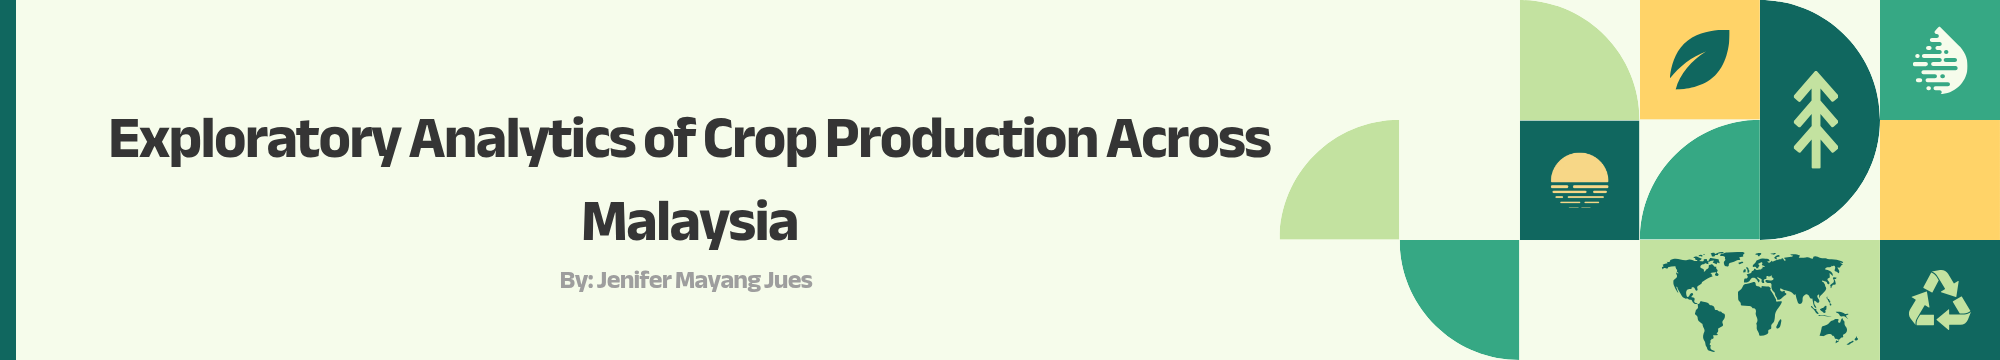

### Project Overview 
This project analyzes Malaysia’s crop production patterns across states and years using exploratory data analysis, machine learning, and interactive dashboards. The goal is to uncover regional crop specialization, production trends, and risk patterns, and translate these insights into decision-ready visuals.

**Tools & Tech**

•	Python (Pandas, NumPy, Scikit-learn, Plotly)

•	Power BI (Dashboard storytelling)

•	Streamlit (Interactive deployment)

•	GeoJSON (Malaysia state mapping)

•	Data source: DOSM Open Data (Agriculture – Crop Production)

**Classification of Crop Type**

•	Cash crops are crops that can provide quick return (within 1 year) to farmers. They include sweet corn, groundnuts, cassava, yam, sweet potato and sugarcane (juice).

•	Industrial crops are crops grown to manufacture raw industrial materials. They are divided into several groups such as fats (coconut), and groups that produce fresheners (coffee and tea). Industrial crops are grown in large quantities with a relatively long period of planting, ranging from one year to many years


•	Herbs refer to shrubs that usually have soft stems and contain plenty of water. This generally means all plants which have value to medicine, food (health and supplements), perfumes, fragrance and cosmetic.

•	Spices are aromatic crops used as coloring and flavoring for culinary purposes such as nutmeg and ginger.

•	Fruits and Vegetables refer specifically to the tropical species grown in Malaysia, which has an equatorial climate. Examples of tropical fruits are banana, mango, papaya, pineapple, durian, rambutan and jackfruit, while examples of tropical vegetables are spinach, okra, eggplant, water spinach, long beans, loofah and bitter gourd.
gourd.

In [2]:
import os
os.getcwd()

'C:\\Users\\jenif\\Documents\\My Data Science Project\\Exploratory Analytics of Crop Production Trend Across Malaysia'

In [3]:
os.chdir('/Users/jenif/Documents/My Data Science Project/Exploratory Analytics of Crop Production Trend Across Malaysia/Dataset')

## 1. Data Load: Crop Dataset

In [5]:
import numpy as np
import pandas as pd

rdf=pd.read_csv("crops_state.csv")

In [6]:
raw_df= pd.DataFrame(rdf)

## 2. Data Understanding

In [8]:
raw_df.dtypes

state            object
date             object
crop_type        object
planted_area    float64
production      float64
dtype: object

#### Univariate analysis

#### a. Barplot

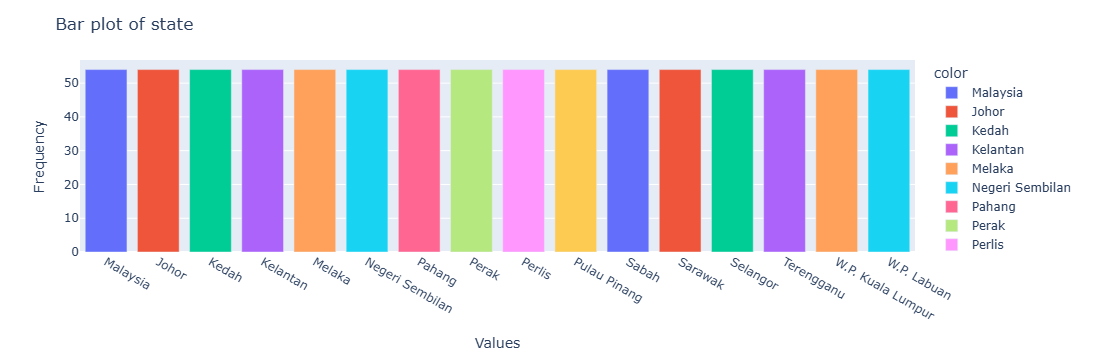

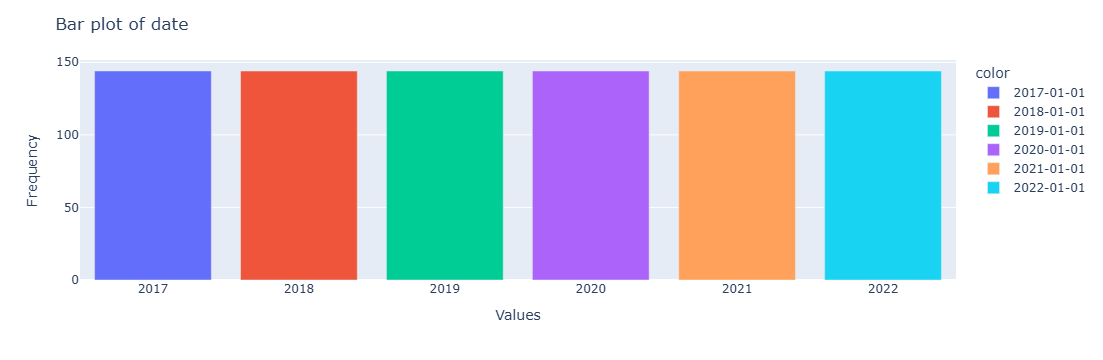

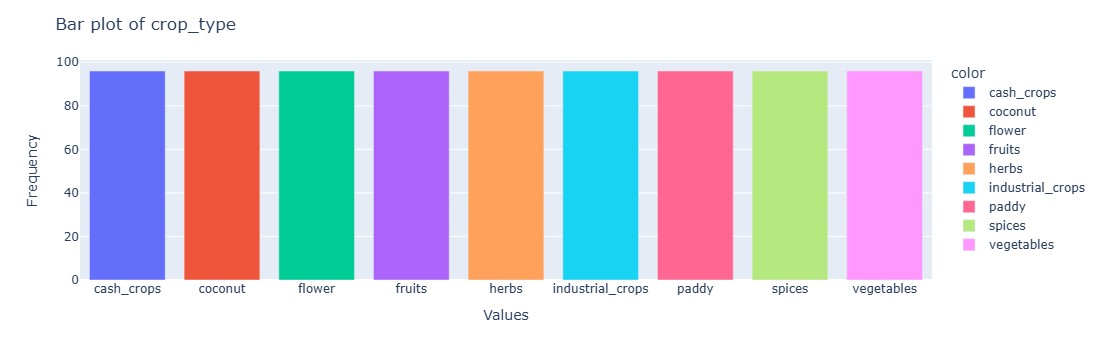

In [11]:
import plotly.express as px
categorical_columns = raw_df.select_dtypes(include=['object'])

# Plot count plot for each categorical column
for column in categorical_columns:
    counts = categorical_columns[column].value_counts()
    fig = px.bar(x=counts.index, y=counts.values, color=counts.index)
    fig.update_layout(
        title=f'Bar plot of {column}',
        xaxis_title='Values',
        yaxis_title='Frequency'
    )
    fig.show()
#### a. Barplot

## 3. Data Cleaning

### 3.1 Handling inconsistent data
###### Identify inconsistent data using unique values

In [15]:
for column in raw_df.columns:
    unique_values = raw_df[column].unique()
    print(f"Unique values {column}: {unique_values}")

Unique values state: ['Malaysia' 'Johor' 'Kedah' 'Kelantan' 'Melaka' 'Negeri Sembilan' 'Pahang'
 'Perak' 'Perlis' 'Pulau Pinang' 'Sabah' 'Sarawak' 'Selangor' 'Terengganu'
 'W.P. Kuala Lumpur' 'W.P. Labuan']
Unique values date: ['2017-01-01' '2018-01-01' '2019-01-01' '2020-01-01' '2021-01-01'
 '2022-01-01']
Unique values crop_type: ['cash_crops' 'coconut' 'flower' 'fruits' 'herbs' 'industrial_crops'
 'paddy' 'spices' 'vegetables']
Unique values planted_area: [2.076310e+04 1.902820e+04 1.708200e+04 1.909090e+04 2.007030e+04
 1.832910e+04 8.325010e+04 8.343640e+04 8.646630e+04 8.494200e+04
 8.146960e+04 8.493590e+04 2.605100e+03 2.652000e+03 2.702300e+03
 2.626700e+03 2.554400e+03 2.588400e+03 2.085901e+05 1.954806e+05
 1.845495e+05 1.918659e+05 1.994198e+05 2.034313e+05 2.424200e+03
 3.010500e+03 2.315700e+03 2.079600e+03 2.017700e+03 2.108000e+03
 1.339285e+05 1.327612e+05 1.384900e+05 1.594860e+05 1.563850e+05
 1.277716e+05 6.855480e+05 6.999800e+05 6.720840e+05 6.449082e+05
 6.479360e

### 3. 3 Handling Missing Data

#### Visualizing Missing Data

<Axes: >

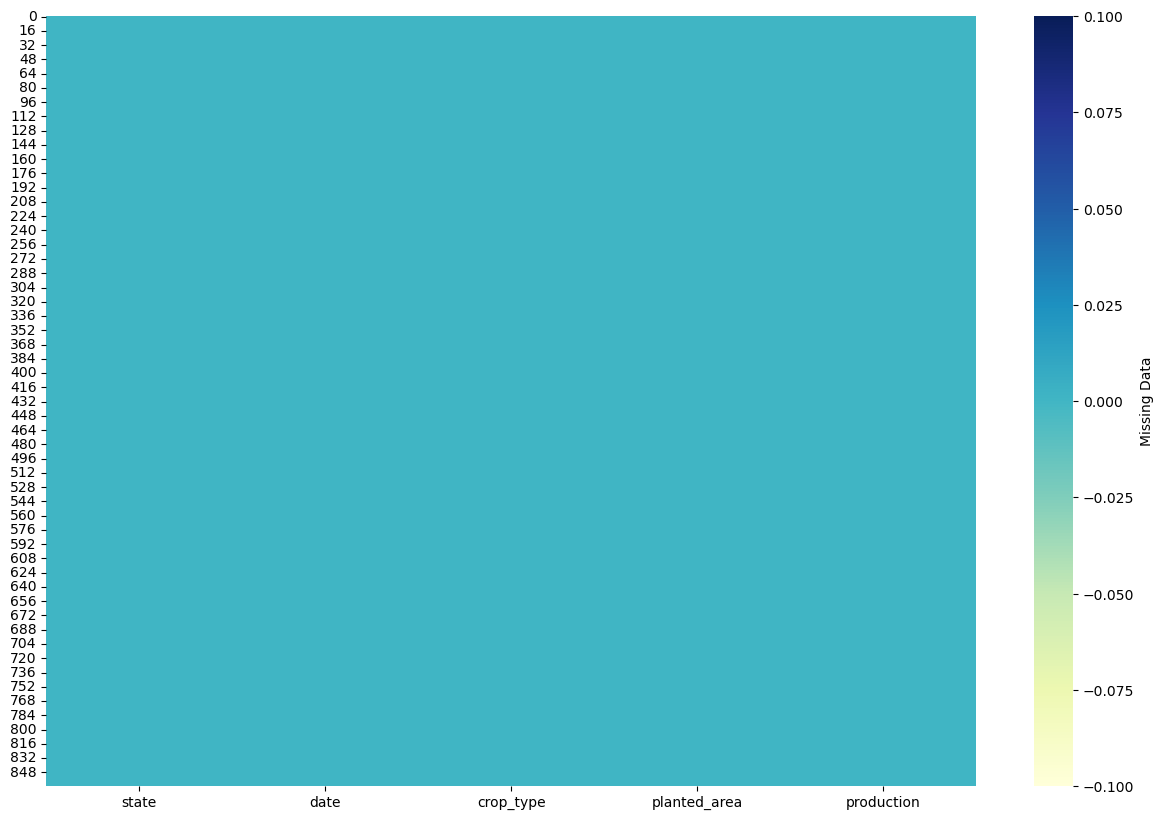

In [18]:
# Visualizing Missing Data using Seaborn heatmap()

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(raw_df.isna(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

In [19]:
file_path = 'clean_crop.csv'  

# Save the DataFrame to a CSV file
raw_df.to_csv(file_path, index=False) 

##### Creating a new copy of clean dataset

In [21]:
cdf = pd.DataFrame(raw_df.copy())

In [22]:
cdf.head()

state        date   crop_type  planted_area  production
0  Malaysia  2017-01-01  cash_crops       20763.1    217847.5
1  Malaysia  2018-01-01  cash_crops       19028.2    215087.6
2  Malaysia  2019-01-01  cash_crops       17082.0    221310.2
3  Malaysia  2020-01-01  cash_crops       19090.9    223506.8
4  Malaysia  2021-01-01  cash_crops       20070.3    239011.9

***Removing data for 'state' value == Malaysia***

In [24]:
cdf = cdf[cdf['state'] != 'Malaysia']


In [25]:
cdf.head()

state        date   crop_type  planted_area  production
54  Johor  2017-01-01  cash_crops        3780.3     42424.1
55  Johor  2018-01-01  cash_crops        3483.7     43420.4
56  Johor  2019-01-01  cash_crops        3007.5     38566.7
57  Johor  2020-01-01  cash_crops        3056.2     42963.0
58  Johor  2021-01-01  cash_crops        3522.4     47538.7

Setting date column to date type and extract year and create new column for year

In [27]:
cdf['date'] = pd.to_datetime(cdf['date'], errors='coerce', dayfirst=True)



In [28]:
cdf['year'] = cdf['date'].dt.year


In [29]:
cdf.head()

state       date   crop_type  planted_area  production  year
54  Johor 2017-01-01  cash_crops        3780.3     42424.1  2017
55  Johor 2018-01-01  cash_crops        3483.7     43420.4  2018
56  Johor 2019-01-01  cash_crops        3007.5     38566.7  2019
57  Johor 2020-01-01  cash_crops        3056.2     42963.0  2020
58  Johor 2021-01-01  cash_crops        3522.4     47538.7  2021

In [30]:
file_path = 'final_crop.csv'  

# Save the DataFrame to a CSV file
cdf.to_csv(file_path, index=False) 

### 5. Exploratory Data Analysis

***5.1 Trend Analysis***

•	How has total crop production changed over time?

•	Which crops show growth / decline

•	Are there seasonal patterns?


In [34]:
import pandas as pd
import plotly.express as px


In [35]:
df_trend = (
    cdf.groupby(['year', 'crop_type'], as_index=False)
      .agg({'production': 'sum'})
)

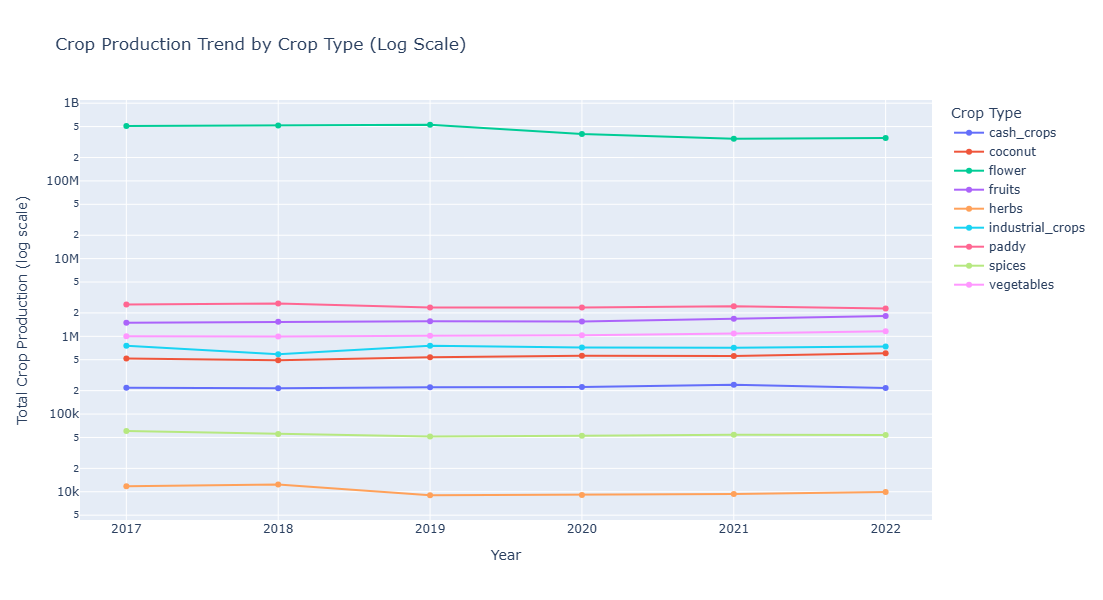

In [36]:
fig = px.line(
    df_trend,
    x='year',
    y='production',
    color='crop_type',
    markers=True,
    title='Crop Production Trend by Crop Type (Log Scale)'
)

fig.update_layout(
    yaxis_type='log',
    xaxis_title='Year',
    yaxis_title='Total Crop Production (log scale)',
    legend_title='Crop Type',
    width=1000,
    height=600
)

fig.show()



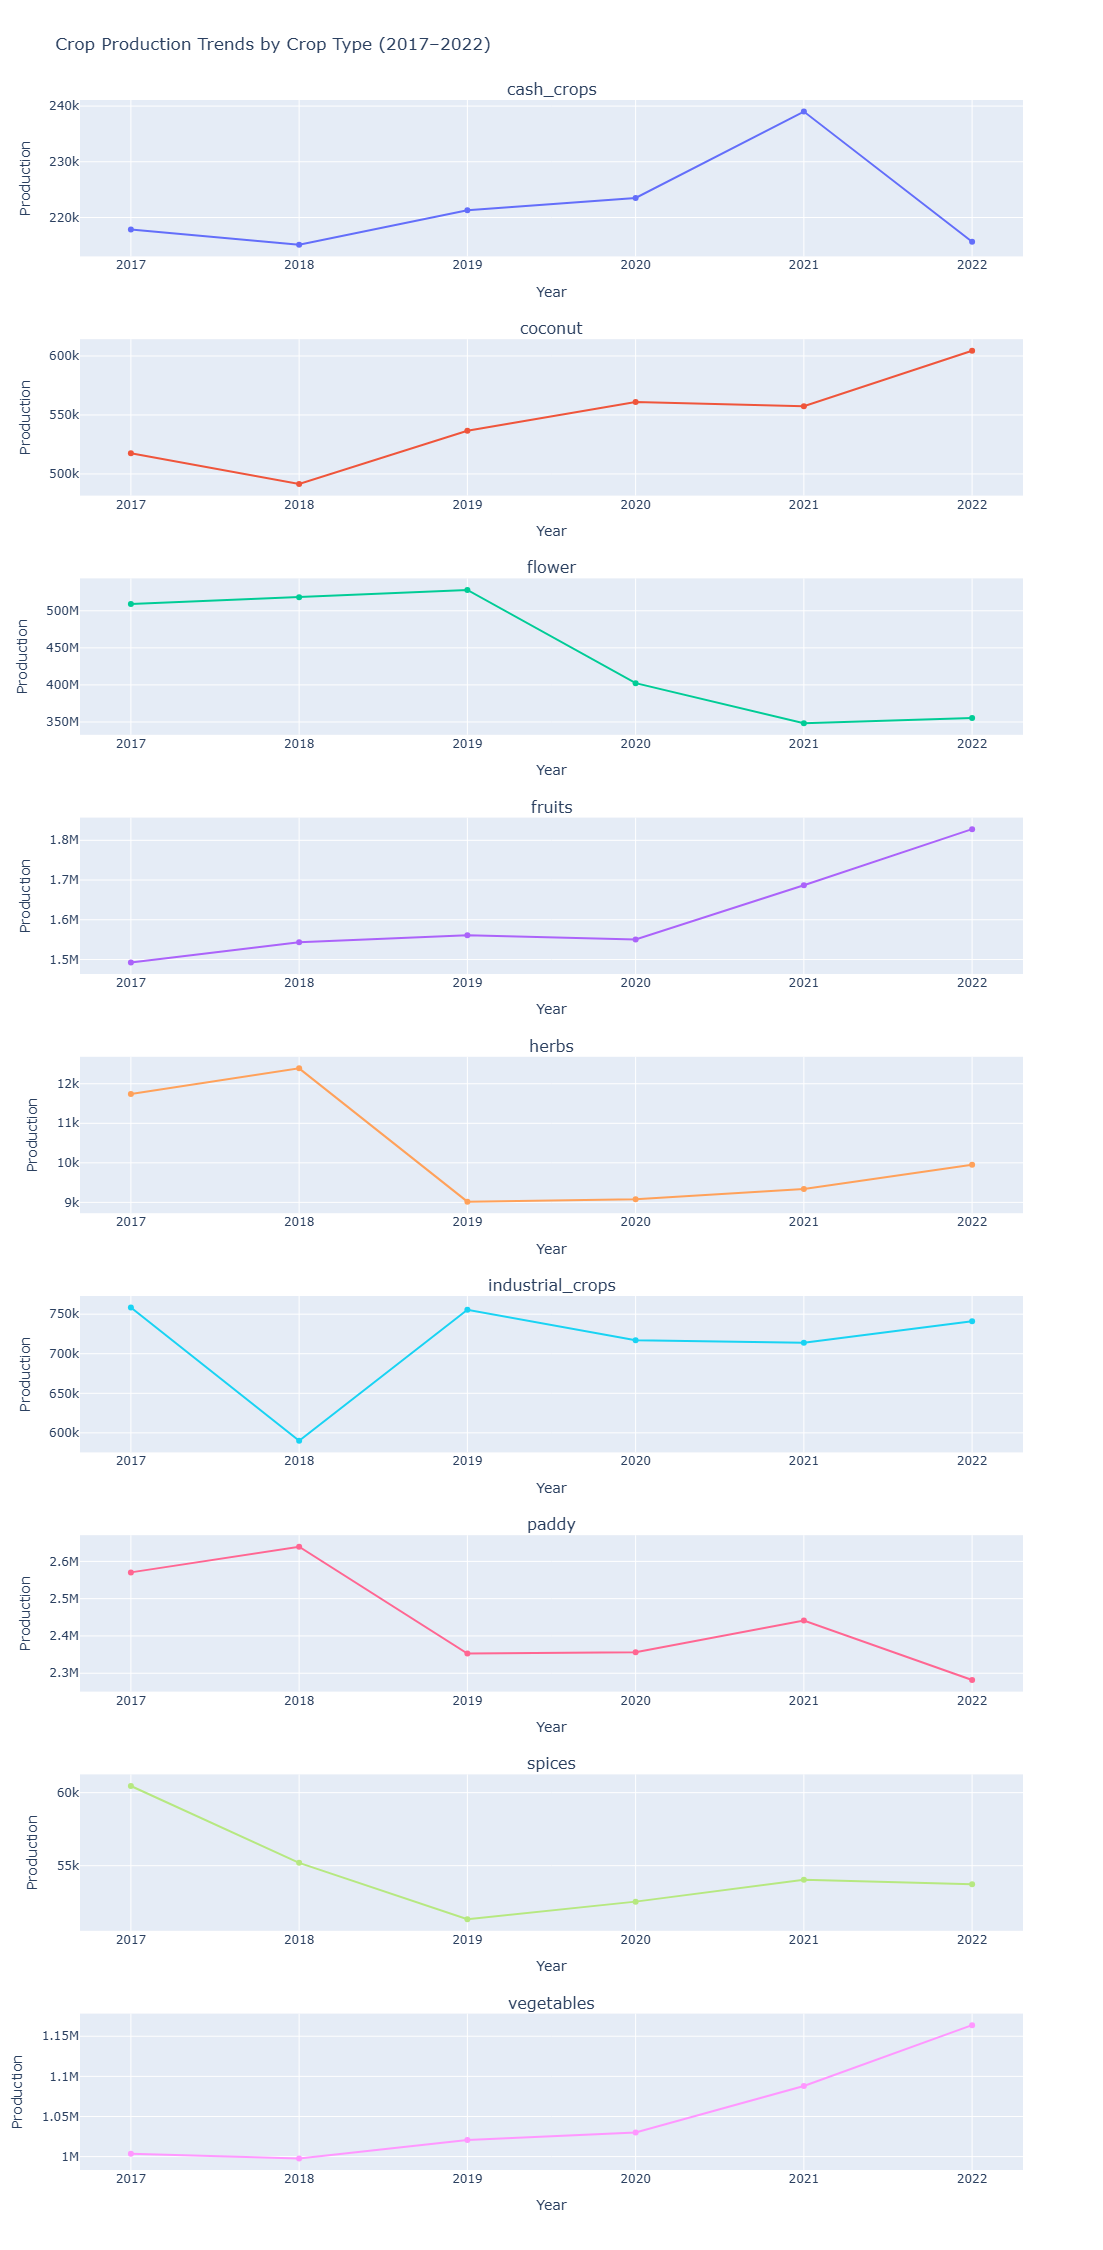

In [37]:

from plotly.subplots import make_subplots
import plotly.graph_objects as go

crop_types = df_trend['crop_type'].unique()

fig = make_subplots(
    rows=len(crop_types),
    cols=1,
    shared_xaxes=True,
    vertical_spacing=0.04,
    subplot_titles=[f"{crop}" for crop in crop_types]  # 👈 subtitles here
)

for i, crop in enumerate(crop_types, start=1):
    df_crop = df_trend[df_trend['crop_type'] == crop]
    
    fig.add_trace(
        go.Scatter(
            x=df_crop['year'],
            y=df_crop['production'],
            mode='lines+markers',
            name=crop,
            showlegend=False  # 👈 legend not needed since title shows crop
        ),
        row=i,
        col=1
    )

fig.update_layout(
    height=250 * len(crop_types),
    title_text='Crop Production Trends by Crop Type (2017–2022)',
)

fig.update_xaxes(title_text='Year', showticklabels=True)
fig.update_yaxes(title_text='Production')

fig.show()


***Key Takeaways:***

Cash crops: Production rose steadily from 2018–2021, peaked in 2021, then dropped sharply in 2022.

Coconut: Output increased from 2018–2020, dipped slightly in 2021, and surged in 2022.

Flowers: Experienced a major drop and recovery between 2017–2019, followed by stable, moderate growth, but still below earlier peak levels.

Industrial crops: Highly volatile—fell sharply in 2018, peaked in 2019, dipped in 2020, remained stable in 2021, and rose slightly by 2022.

Herbs: Peaked in 2018, crashed in 2019, then showed slow but steady recovery through 2022.

Paddy: Peaked in 2018, collapsed in 2019, briefly recovered in 2021, and fell to its lowest level in 2022.

Spices: Declined sharply from 2017–2019 and, despite gradual recovery, remain well below 2017 levels.

Vegetables: Grew steadily from 2018, accelerating into rapid growth by 2022.

***5.2 State level comparison***

•	Which states contribute most to production?

•	Crop specialization by state

•	Production concentration risk


Heatmap to highlights crop–state dominance and regional specialization

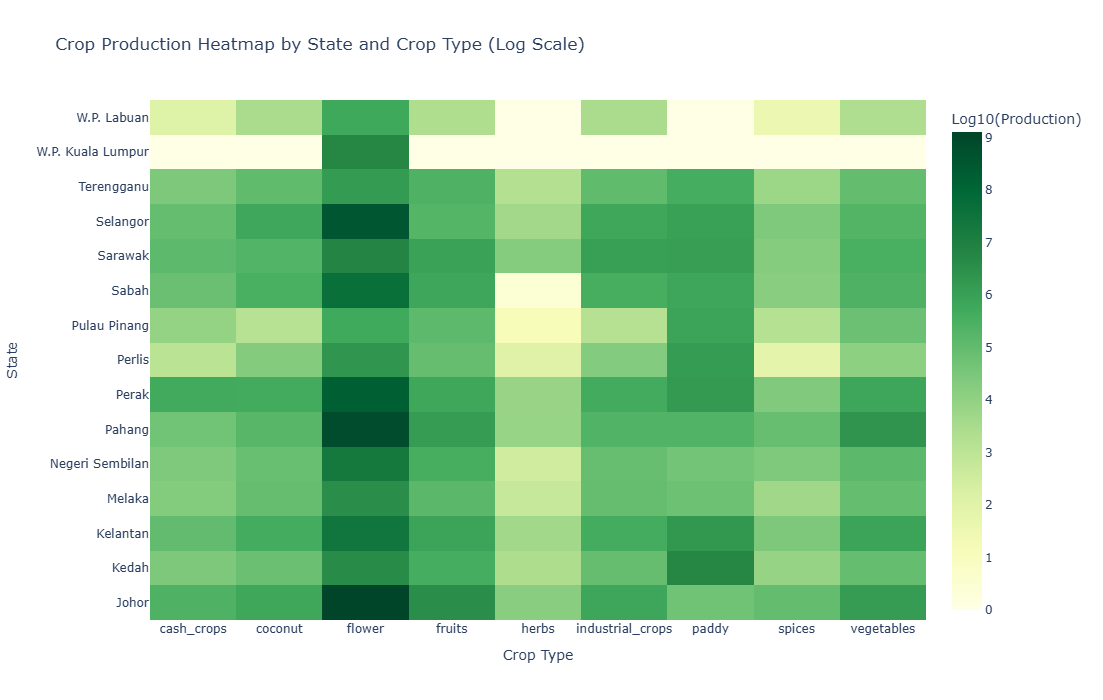

In [42]:
import numpy as np
import plotly.express as px

df_heatmap = (
    cdf.groupby(['state', 'crop_type'], as_index=False)
      .agg({'production': 'sum'})
)

# log-transform
df_heatmap['log_production'] = np.log10(df_heatmap['production'] + 1)

fig = px.density_heatmap(
    df_heatmap,
    x='crop_type',
    y='state',
    z='log_production',
    color_continuous_scale='YlGn',
    hover_data={'production': True},
    title='Crop Production Heatmap by State and Crop Type (Log Scale)'
)

fig.update_layout(
    width=1000,
    height=700,
    xaxis_title='Crop Type',
    yaxis_title='State'
)

fig.update_coloraxes(colorbar_title='Log10(Production)')

fig.show()


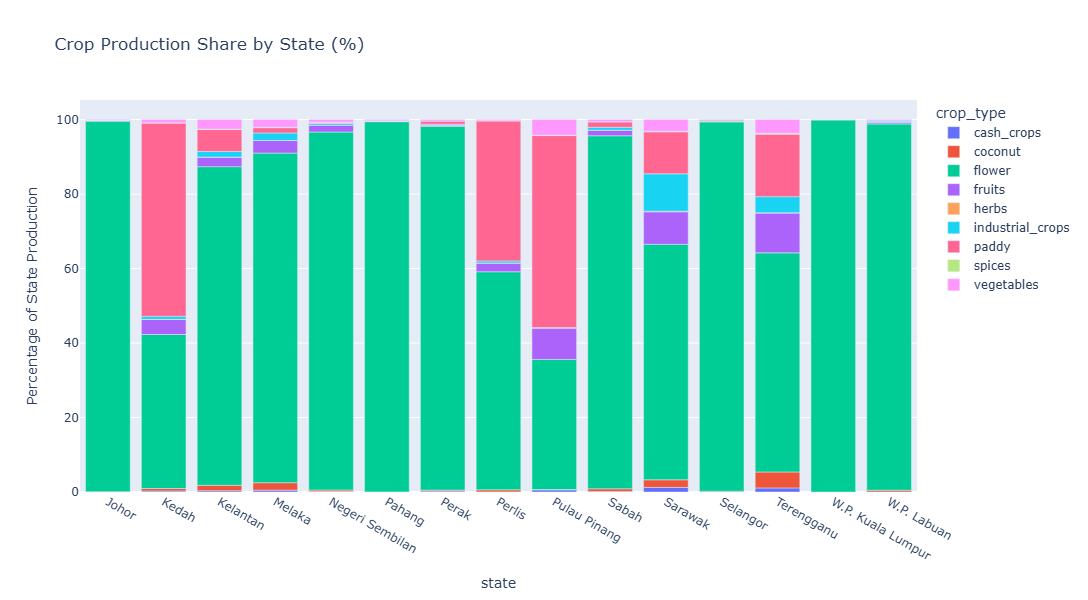

In [43]:
df_bar = (
    cdf.groupby(['state', 'crop_type'], as_index=False)
      .agg({'production': 'sum'})
)

df_pct = df_bar.copy()
df_pct['percentage'] = (
    df_pct['production'] /
    df_pct.groupby('state')['production'].transform('sum')
) * 100

fig = px.bar(
    df_pct,
    x='state',
    y='percentage',
    color='crop_type',
    title='Crop Production Share by State (%)'
)

fig.update_layout(
    yaxis_title='Percentage of State Production',
    width=1000,
    height=600
)


fig.show()


A bar chart and pie chart were used to visualize the distribution of total crop production across Malaysian states, highlighting top contributors and regional disparities

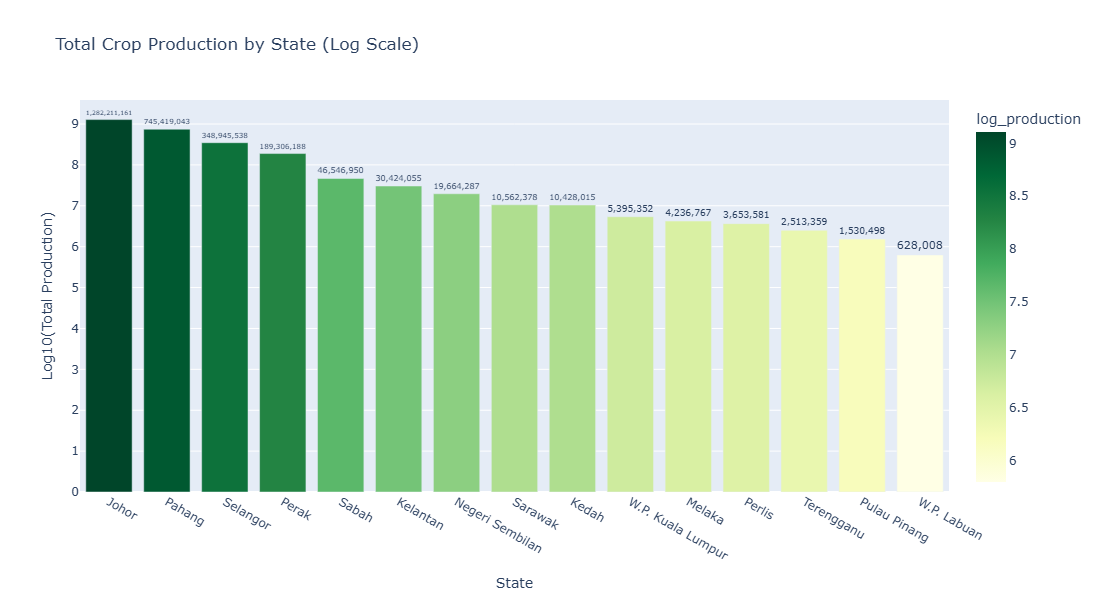

In [45]:
df_state = cdf.groupby('state', as_index=False).agg({'production': 'sum'})

import numpy as np
df_state['log_production'] = np.log10(df_state['production'] + 1)

fig = px.bar(
    df_state.sort_values('log_production', ascending=False),
    x='state',
    y='log_production',
    text='production',
    title='Total Crop Production by State (Log Scale)',
    color='log_production',
    color_continuous_scale='YlGn'
)

fig.update_layout(
    xaxis_title='State',
    yaxis_title='Log10(Total Production)',
    width=1000,
    height=600
)

fig.update_traces(
    texttemplate='%{text:,.0f}',
    textposition='outside'
)

fig.show()


Due to highly skewed production values, a log-scale color transformation was applied to preserve visibility of lower-producing states.

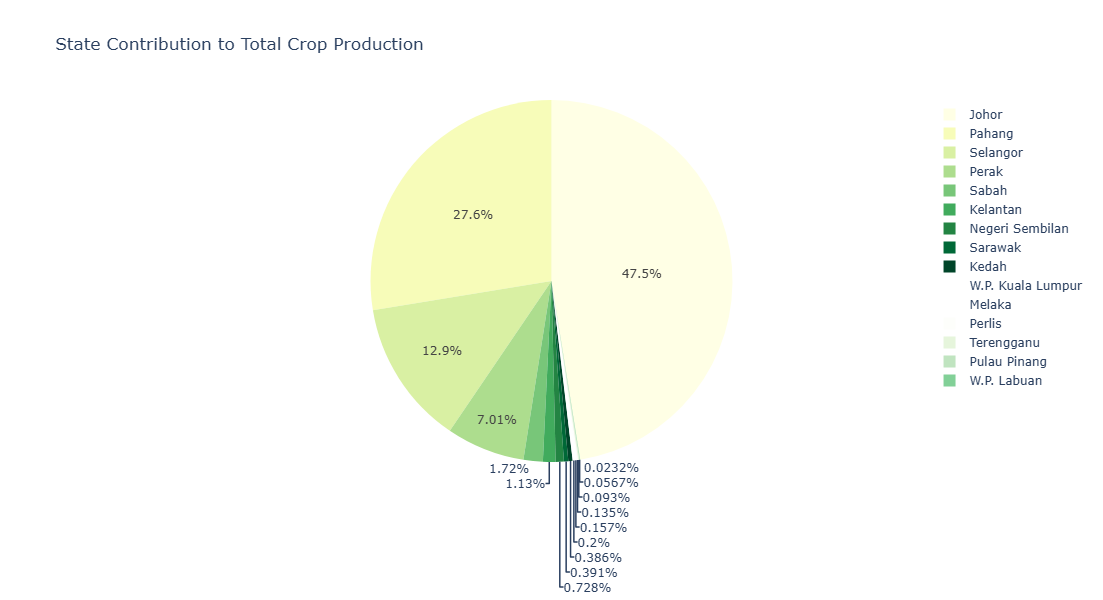

In [46]:
fig = px.pie(
    df_state,
    names='state',
    values='production',
    title='State Contribution to Total Crop Production',
    color_discrete_sequence=px.colors.sequential.YlGn
)

fig.update_layout(
    width=1000,
    height=600
)

fig.show()


***Load malaysia geojson file for mapping***

In [48]:
import json

with open("malaysia_states.json", "r", encoding="utf-8") as f:
    malaysia_geojson = json.load(f)


***Inspecting geojson file***

In [50]:
malaysia_geojson['features'][0]['properties']

{'source': 'https://simplemaps.com', 'id': 'MY12', 'name': 'Sabah'}

Ensuring all state names in geojson style

In [52]:
sorted([f['properties']['name'] for f in malaysia_geojson['features']])


['Johor',
 'Kedah',
 'Kelantan',
 'Kuala Lumpur',
 'Labuan',
 'Melaka',
 'Negeri Sembilan',
 'Pahang',
 'Perak',
 'Perlis',
 'Pulau Pinang',
 'Putrajaya',
 'Sabah',
 'Sarawak',
 'Selangor',
 'Terengganu']

Replacing mismatch state name based on Malaysia state geojson style

In [54]:
df_map = (
    cdf.groupby('state', as_index=False)
      .agg({'production': 'sum'})
)

state_mapping = {'W.P. Kuala Lumpur': 'Kuala Lumpur', 'W.P. Labuan' : 'Labuan'}

df_map['state'] = df_map['state'].replace(state_mapping)


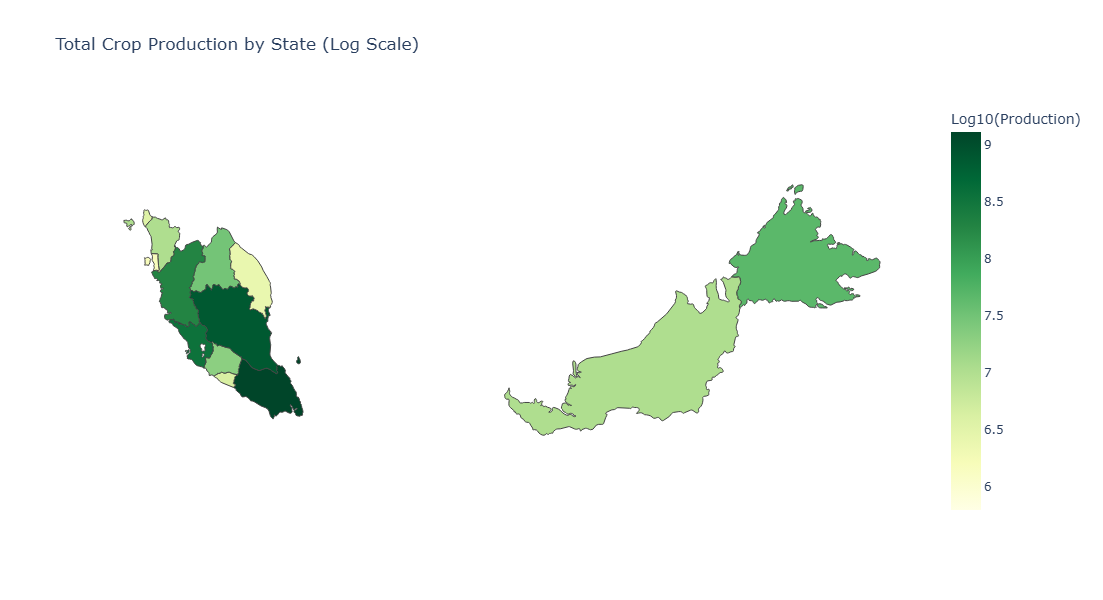

In [55]:
df_map = (
    cdf.groupby('state', as_index=False)
      .agg({'production': 'sum'})
)

df_map['log_production'] = np.log10(df_map['production'] + 1)

import plotly.express as px

fig = px.choropleth(
    df_map,
    geojson=malaysia_geojson,
    locations='state',
    featureidkey='properties.name',
    color='log_production',
    color_continuous_scale='YlGn',
    title='Total Crop Production by State (Log Scale)'
)

fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(
    coloraxis_colorbar_title='Log10(Production)',
    width=1000,
    height=600

)

fig.show()



### 6. State Clustering by Crop Profile

Unsupervised Learning – K-Means Clustering is used to perform clustering by crop profile.

States were clustered based on:
•	Crop mix proportions

•	Production volume

•	Growth trends

This allowed discovery of natural groupings without predefined labels


#### 6.1 Preparing the data for Clustering

Pivot to crop mix

In [60]:
import pandas as pd

# Aggregate total production by state and crop type
df_state_crop = cdf.groupby(['state', 'crop_type'], as_index=False)['production'].sum()

# Pivot to wide format (states x crop types)
df_features = df_state_crop.pivot(index='state', columns='crop_type', values='production').fillna(0)

# Optional: normalize by total production to get crop mix proportions
df_features_prop = df_features.div(df_features.sum(axis=1), axis=0)


In [61]:
df_features

crop_type          cash_crops   coconut        flower     fruits    herbs  \
state                                                                       
Johor                261872.9  651665.4  1.275478e+09  3676252.3  15264.3   
Kedah                 28083.9   69463.8  4.312594e+06   421677.3   2507.9   
Kelantan             103951.2  445585.9  2.602929e+07   781033.2   4706.2   
Melaka                21026.9   84638.5  3.750329e+06   142424.2    571.9   
Negeri Sembilan       26841.0   77608.9  1.890407e+07   370286.9    325.9   
Pahang                49906.3  168885.1  7.410721e+08  1322212.0   7411.8   
Perak                512243.6  468179.8  1.848932e+08   651475.5   6990.4   
Perlis                 1187.5   19991.4  2.139349e+06    85696.6    113.7   
Pulau Pinang           8846.2    1309.2  5.346860e+05   129220.2     12.6   
Sabah                 70440.5  333274.7  4.412173e+07   698056.1      1.7   
Sarawak              131396.6  214916.3  6.680347e+06   920258.7  17451.7   
Selangor              89027.0  622309.4  3.461836e+08   192256.2   4354.1   
Terengganu            27466.9  107713.6  1.478814e+06   268789.6   1805.9   
W.P. Kuala Lumpur         0.0       0.0  5.395352e+06        0.0      0.0   
W.P. Labuan             106.2    2884.6  6.176410e+05     2303.4      0.0   

crop_type          industrial_crops      paddy   spices  vegetables  
state                                                                
Johor                      681233.8    53056.0  91455.9   1302106.7  
Kedah                       86114.6  5409781.0   8230.1     89562.0  
Kelantan                   449151.9  1810363.0  27081.0    772890.7  
Melaka                      85817.4    59961.0   5036.5     86961.3  
Negeri Sembilan             81638.2    43980.0  26115.1    133418.8  
Pahang                     226690.0   231900.0  81016.8   2258884.7  
Perak                      470832.2  1590007.0  22875.2    690378.3  
Perlis                      20291.9  1374861.0     72.7     12017.3  
Pulau Pinang                 1549.8   789257.0   1569.2     64047.6  
Sabah                      360613.1   683590.0  15224.8    264020.4  
Sarawak                   1060402.7  1190917.9  17772.2    328914.7  
Selangor                   640037.2   982749.0  24858.8    206352.0  
Terengganu                 108733.8   421890.0   5954.4     92191.1  
W.P. Kuala Lumpur               0.0        0.0      0.0         0.0  
W.P. Labuan                  2893.9        0.0     33.7      2145.5

Add growth trends per crop

In [63]:
df_trend_cluster = cdf.groupby(['state', 'crop_type', 'year'], as_index=False)['production'].sum()

# compute CAGR for each crop in each state
cagr_list = []
for state in df_trend_cluster['state'].unique():
    df_state_cluster = df_trend_cluster[df_trend_cluster['state'] == state]
    for crop in df_state_cluster['crop_type'].unique():
        crop_df = df_state_cluster[df_state_cluster['crop_type'] == crop].sort_values('year')
        start = crop_df.iloc[0]['production']
        end = crop_df.iloc[-1]['production']
        years = crop_df['year'].max() - crop_df['year'].min()
        cagr = ((end / start)**(1/years) - 1) if start != 0 else 0
        cagr_list.append({'state': state, 'crop_type': crop, 'cagr': cagr})

df_cagr = pd.DataFrame(cagr_list)
df_cagr_pivot = df_cagr.pivot(index='state', columns='crop_type', values='cagr').fillna(0)


In [64]:
df_cagr_pivot

crop_type          cash_crops   coconut    flower    fruits     herbs  \
state                                                                   
Johor                0.020524  0.028631 -0.072591  0.050500  0.032818   
Kedah               -0.038816  0.407504 -0.007647  0.142039 -0.128708   
Kelantan             0.071782  0.052400 -0.030904  0.087923  0.040375   
Melaka              -0.105795  0.147290  0.001356 -0.018960 -0.240922   
Negeri Sembilan      0.079224  0.040057 -0.042336  0.085644  0.035363   
Pahang              -0.066958 -0.049752 -0.073107  0.067645 -0.164017   
Perak                0.031157  0.013745 -0.067699 -0.009182  0.010635   
Perlis               0.119577  0.118541 -0.029739 -0.225829  0.043815   
Pulau Pinang         0.148657 -0.207196 -0.005769  0.075837 -0.044535   
Sabah               -0.034034  0.045126 -0.031911 -0.004105  0.000000   
Sarawak             -0.029205 -0.043491 -0.032292 -0.003699 -0.002345   
Selangor            -0.143732  0.013821 -0.063218  0.163656 -0.088736   
Terengganu          -0.092629  0.013323  0.005946 -0.109745 -0.088376   
W.P. Kuala Lumpur    0.000000  0.000000 -0.034589  0.000000  0.000000   
W.P. Labuan         -1.000000 -0.084559 -0.033629  0.056095  0.000000   

crop_type          industrial_crops     paddy    spices  vegetables  
state                                                                
Johor                      0.017074  0.048133  0.042859    0.037743  
Kedah                      0.344482 -0.023291  0.093877   -0.015673  
Kelantan                   0.051994 -0.025099  0.014640    0.033596  
Melaka                     0.147168 -0.031995 -0.099461   -0.071021  
Negeri Sembilan            0.037680 -0.135978  0.124709   -0.009285  
Pahang                    -0.009378  0.124763 -0.104339    0.050745  
Perak                      0.014077 -0.016850 -0.079638    0.017116  
Perlis                     0.117894  0.002112  0.647882    0.123912  
Pulau Pinang              -0.254507 -0.035643 -0.007998   -0.050580  
Sabah                      0.033739 -0.006153  0.041264    0.013643  
Sarawak                   -0.117640 -0.097745 -0.042436    0.005034  
Selangor                   0.017083 -0.015036 -0.133409   -0.021590  
Terengganu                 0.013702 -0.015234 -0.060352   -0.035325  
W.P. Kuala Lumpur          0.000000  0.000000  0.000000    0.000000  
W.P. Labuan               -0.083072  0.000000 -1.000000    0.015097

Combine features crop mix + trends

In [66]:
df_cluster = pd.concat([df_features_prop, df_cagr_pivot], axis=1)

In [67]:
df_cluster

crop_type          cash_crops   coconut    flower    fruits         herbs  \
state                                                                       
Johor                0.000204  0.000508  0.994749  0.002867  1.190467e-05   
Kedah                0.002693  0.006661  0.413558  0.040437  2.404964e-04   
Kelantan             0.003417  0.014646  0.855550  0.025672  1.546868e-04   
Melaka               0.004963  0.019977  0.885187  0.033616  1.349850e-04   
Negeri Sembilan      0.001365  0.003947  0.961340  0.018830  1.657319e-05   
Pahang               0.000067  0.000227  0.994169  0.001774  9.943132e-06   
Perak                0.002706  0.002473  0.976689  0.003441  3.692642e-05   
Perlis               0.000325  0.005472  0.585549  0.023456  3.112015e-05   
Pulau Pinang         0.005780  0.000855  0.349354  0.084430  8.232616e-06   
Sabah                0.001513  0.007160  0.947897  0.014997  3.652226e-08   
Sarawak              0.012440  0.020347  0.632466  0.087126  1.652251e-03   
Selangor             0.000255  0.001783  0.992085  0.000551  1.247788e-05   
Terengganu           0.010928  0.042856  0.588381  0.106944  7.185204e-04   
W.P. Kuala Lumpur    0.000000  0.000000  1.000000  0.000000  0.000000e+00   
W.P. Labuan          0.000169  0.004593  0.983492  0.003668  0.000000e+00   

crop_type          industrial_crops     paddy    spices  vegetables  \
state                                                                 
Johor                      0.000531  0.000041  0.000071    0.001016   
Kedah                      0.008258  0.518774  0.000789    0.008589   
Kelantan                   0.014763  0.059504  0.000890    0.025404   
Melaka                     0.020255  0.014153  0.001189    0.020525   
Negeri Sembilan            0.004152  0.002237  0.001328    0.006785   
Pahang                     0.000304  0.000311  0.000109    0.003030   
Perak                      0.002487  0.008399  0.000121    0.003647   
Perlis                     0.005554  0.376305  0.000020    0.003289   
Pulau Pinang               0.001013  0.515686  0.001025    0.041848   
Sabah                      0.007747  0.014686  0.000327    0.005672   
Sarawak                    0.100394  0.112751  0.001683    0.031140   
Selangor                   0.001834  0.002816  0.000071    0.000591   
Terengganu                 0.043262  0.167859  0.002369    0.036680   
W.P. Kuala Lumpur          0.000000  0.000000  0.000000    0.000000   
W.P. Labuan                0.004608  0.000000  0.000054    0.003416   

crop_type          cash_crops   coconut    flower    fruits     herbs  \
state                                                                   
Johor                0.020524  0.028631 -0.072591  0.050500  0.032818   
Kedah               -0.038816  0.407504 -0.007647  0.142039 -0.128708   
Kelantan             0.071782  0.052400 -0.030904  0.087923  0.040375   
Melaka              -0.105795  0.147290  0.001356 -0.018960 -0.240922   
Negeri Sembilan      0.079224  0.040057 -0.042336  0.085644  0.035363   
Pahang              -0.066958 -0.049752 -0.073107  0.067645 -0.164017   
Perak                0.031157  0.013745 -0.067699 -0.009182  0.010635   
Perlis               0.119577  0.118541 -0.029739 -0.225829  0.043815   
Pulau Pinang         0.148657 -0.207196 -0.005769  0.075837 -0.044535   
Sabah               -0.034034  0.045126 -0.031911 -0.004105  0.000000   
Sarawak             -0.029205 -0.043491 -0.032292 -0.003699 -0.002345   
Selangor            -0.143732  0.013821 -0.063218  0.163656 -0.088736   
Terengganu          -0.092629  0.013323  0.005946 -0.109745 -0.088376   
W.P. Kuala Lumpur    0.000000  0.000000 -0.034589  0.000000  0.000000   
W.P. Labuan         -1.000000 -0.084559 -0.033629  0.056095  0.000000   

crop_type          industrial_crops     paddy    spices  vegetables  
state                                                                
Johor                      0.017074  0.048133  0.042859    0.037743  
Kedah                      0.3

#### 6.2 Scaling the features

In [69]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)


#### 6.3 Applying K-Means Clustering

In [71]:
from sklearn.cluster import KMeans

# You can start with 3 clusters as you suggested
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Assign cluster labels to states
df_cluster['cluster'] = kmeans.labels_


C:\Users\jenif\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



#### 6.4 Clustering Evaluation

The clustering performance is evaluated by using Elbow method and Silhouete score

**Method 1: Elbow method**

C:\Users\jenif\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\jenif\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\jenif\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\jenif\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

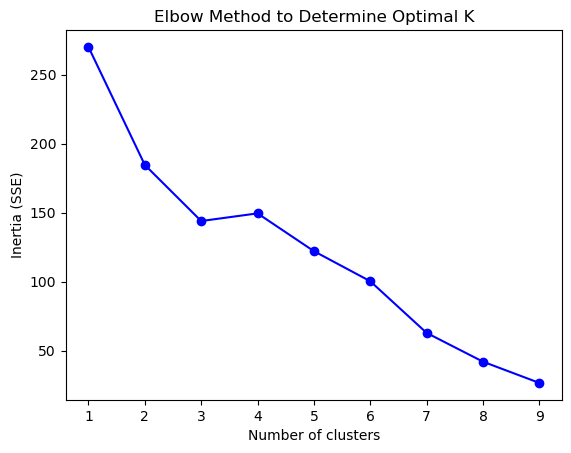

In [74]:
import matplotlib.pyplot as plt

inertia = []
K = range(1, 10)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Method to Determine Optimal K')
plt.show()


**Method 2: Silhoute score**

In [76]:
from sklearn.metrics import silhouette_score

for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"K={k}, Silhouette Score={score:.3f}")


C:\Users\jenif\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\jenif\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\jenif\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



K=2, Silhouette Score=0.338
K=3, Silhouette Score=0.275
K=4, Silhouette Score=0.037


C:\Users\jenif\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\jenif\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\jenif\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



K=5, Silhouette Score=0.063
K=6, Silhouette Score=0.059
K=7, Silhouette Score=0.113
K=8, Silhouette Score=0.137
K=9, Silhouette Score=0.140


C:\Users\jenif\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\jenif\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



#### 6.5 Analyze cluster

In [78]:
# Merge cluster labels with state names
df_cluster_labels = df_cluster[['cluster']]
df_cluster_labels['state'] = df_cluster.index

# Example: mean crop mix per cluster
cluster_summary = df_features_prop.join(df_cluster_labels.set_index('state')).groupby('cluster').mean()
print(cluster_summary)


crop_type  cash_crops   coconut    flower    fruits     herbs  \
cluster                                                         
0            0.001002  0.004081  0.929152  0.009526  0.000027   
1            0.009716  0.021353  0.523401  0.092834  0.000793   
2            0.003828  0.013319  0.649373  0.037027  0.000188   

crop_type  industrial_crops     paddy    spices  vegetables  
cluster                                                      
0                  0.004198  0.046430  0.000299    0.005285  
1                  0.048223  0.265432  0.001692    0.036556  
2                  0.014257  0.266463  0.000989    0.014557  


C:\Users\jenif\AppData\Local\Temp\ipykernel_10848\278069472.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**Key Takeaways:**

Based on the result above, it has been noted that cluster 0 is extremely concentrated in flower production with very little diversification.
    
Meanwhile, cluster 0 is still flower-heavy but much more diversified and strong presence in staple crop.
    
Cluster 3 is balanced between floriculture and  paddy crops.


#### 6.6 Visualize clusters

Visual 1 : PCA Method

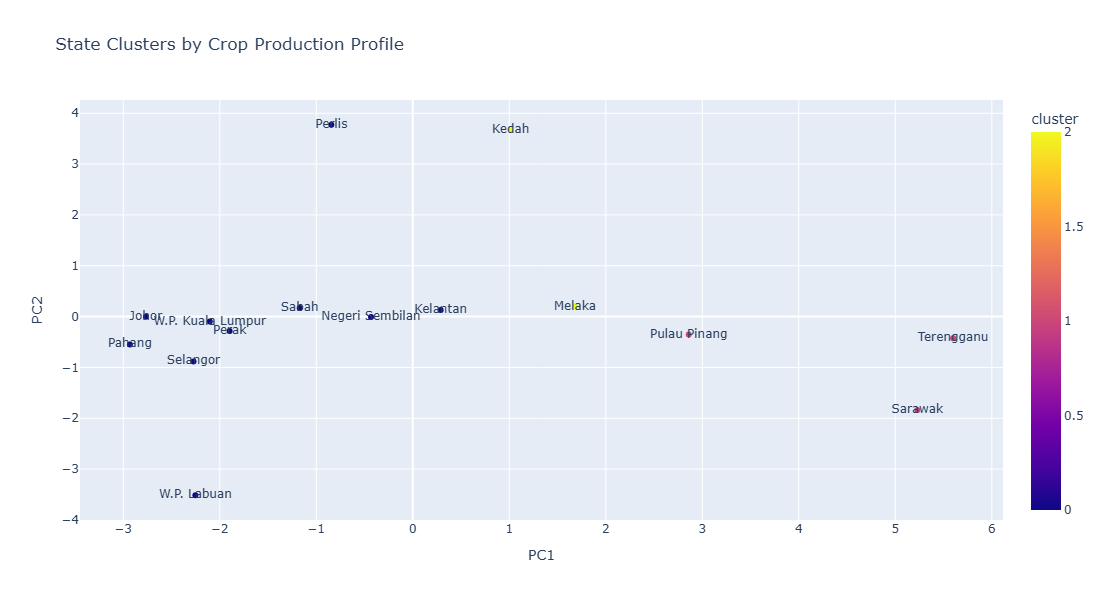

In [81]:
from sklearn.decomposition import PCA
import plotly.express as px

pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

df_vis = pd.DataFrame(components, columns=['PC1', 'PC2'])
df_vis['state'] = df_cluster.index
df_vis['cluster'] = df_cluster['cluster'].values

fig = px.scatter(df_vis, x='PC1', y='PC2', text='state', color='cluster',
                 title='State Clusters by Crop Production Profile')

fig.update_layout(
    width=1000,
    height=600

)

fig.show()


Visual 2: Mapping

Assign cluster names based on dominant crop

In [84]:
# Find dominant crop per state
dominant_crop = df_features_prop.idxmax(axis=1)

# Merge with clusters
df_cluster_map = df_cluster.copy()
df_cluster_map['dominant_crop'] = dominant_crop
df_cluster_map = df_cluster_map.reset_index()  # ensure 'state' is a column


Clusters were labeled using dominant crop composition:

•	Flower-specialized

•	Mixed crop (flowers + paddy)

•	Flower + rice-focused


Map numeric clusters → descriptive labels

In [86]:
# Mapping cluster numbers to descriptive labels
cluster_labels = {
    0: 'Flower-specialized',
    1: 'Mixed crop (flowers+paddy)',
    2: 'Flower + Rice-focused'
}

df_cluster_map['cluster_label'] = df_cluster_map['cluster'].map(cluster_labels)



Plot choropleth

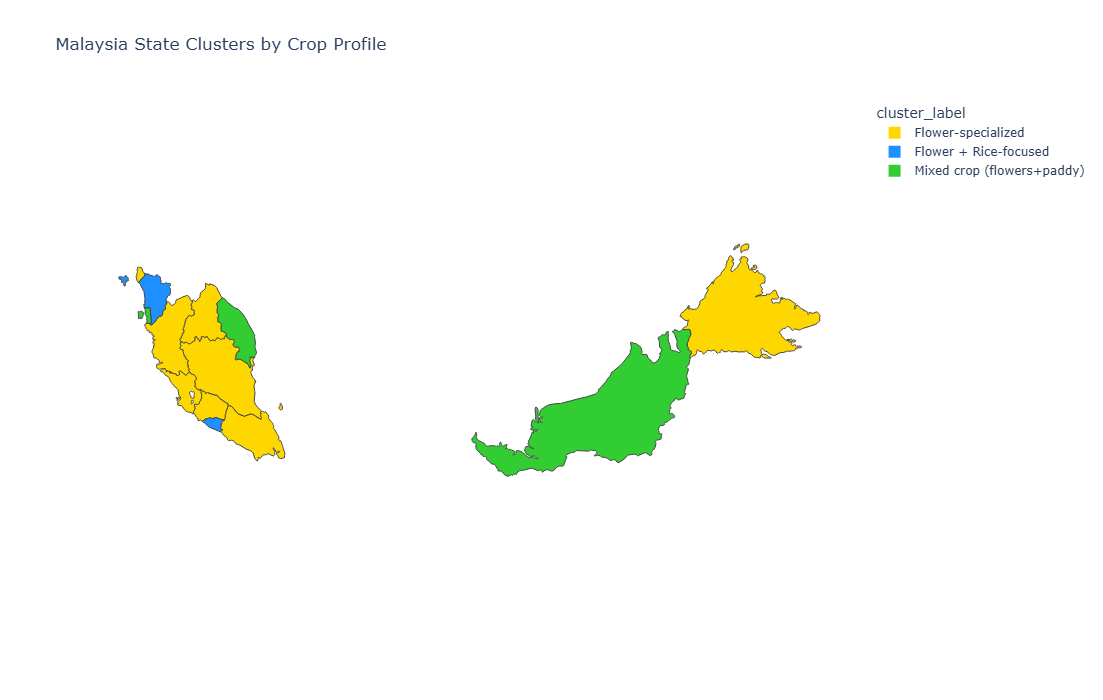

In [88]:
import plotly.express as px

fig = px.choropleth(
    df_cluster_map,
    geojson=malaysia_geojson,
    locations='state',
    featureidkey='properties.name',
    color='cluster_label',            # use descriptive labels
    hover_name='state',
    hover_data={'cluster_label': True, 'dominant_crop': True},
    color_discrete_map={
        'Flower-specialized': '#FFD700',
        'Mixed crop (flowers+paddy)': '#32CD32',
        'Flower + Rice-focused': '#1E90FF'
    },
    title='Malaysia State Clusters by Crop Profile'
)

fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(width=1000, height=700)
fig.show()


In [89]:
df_cluster_map

crop_type              state  cash_crops   coconut    flower    fruits  \
0                      Johor    0.000204  0.000508  0.994749  0.002867   
1                      Kedah    0.002693  0.006661  0.413558  0.040437   
2                   Kelantan    0.003417  0.014646  0.855550  0.025672   
3                     Melaka    0.004963  0.019977  0.885187  0.033616   
4            Negeri Sembilan    0.001365  0.003947  0.961340  0.018830   
5                     Pahang    0.000067  0.000227  0.994169  0.001774   
6                      Perak    0.002706  0.002473  0.976689  0.003441   
7                     Perlis    0.000325  0.005472  0.585549  0.023456   
8               Pulau Pinang    0.005780  0.000855  0.349354  0.084430   
9                      Sabah    0.001513  0.007160  0.947897  0.014997   
10                   Sarawak    0.012440  0.020347  0.632466  0.087126   
11                  Selangor    0.000255  0.001783  0.992085  0.000551   
12                Terengganu    0.010928  0.042856  0.588381  0.106944   
13         W.P. Kuala Lumpur    0.000000  0.000000  1.000000  0.000000   
14               W.P. Labuan    0.000169  0.004593  0.983492  0.003668   

crop_type         herbs  industrial_crops     paddy    spices  vegetables  \
0          1.190467e-05          0.000531  0.000041  0.000071    0.001016   
1          2.404964e-04          0.008258  0.518774  0.000789    0.008589   
2          1.546868e-04          0.014763  0.059504  0.000890    0.025404   
3          1.349850e-04          0.020255  0.014153  0.001189    0.020525   
4          1.657319e-05          0.004152  0.002237  0.001328    0.006785   
5          9.943132e-06          0.000304  0.000311  0.000109    0.003030   
6          3.692642e-05          0.002487  0.008399  0.000121    0.003647   
7          3.112015e-05          0.005554  0.376305  0.000020    0.003289   
8          8.232616e-06          0.001013  0.515686  0.001025    0.041848   
9          3.652226e-08          0.007747  0.014686  0.000327    0.005672   
10         1.652251e-03          0.100394  0.112751  0.001683    0.031140   
11         1.247788e-05          0.001834  0.002816  0.000071    0.000591   
12         7.185204e-04          0.043262  0.167859  0.002369    0.036680   
13         0.000000e+00          0.000000  0.000000  0.000000    0.000000   
14         0.000000e+00          0.004608  0.000000  0.000054    0.003416   

crop_type  ...    flower    fruits     herbs  industrial_crops     paddy  \
0          ... -0.072591  0.050500  0.032818          0.017074  0.048133   
1          ... -0.007647  0.142039 -0.128708          0.344482 -0.023291   
2          ... -0.030904  0.087923  0.040375          0.051994 -0.025099   
3          ...  0.001356 -0.018960 -0.240922          0.147168 -0.031995   
4          ... -0.042336  0.085644  0.035363          0.037680 -0.135978   
5          ... -0.073107  0.067645 -0.164017         -0.009378  0.124763   
6          ... -0.067699 -0.009182  0.010635          0.014077 -0.016850   
7          ... -0.029739 -0.225829  0.043815          0.117894  0.002112   
8          ... -0.005769  0.075837 -0.044535         -0.254507 -0.035643   
9          ... -0.031911 -0.004105  0.000000          0.033739 -0.006153   
10         ... -0.032292 -0.003699 -0.002345         -0.117640 -0.097745   
11         ... -0.063218  0.163656 -0.088736          0.017083 -0.015036   
12         ...  0.005946 -0.109745 -0.088376          0.013702 -0.015234   
13         ... -0.034589  0.000000  0.000000          0.000000  0.000000   
14         ... -0.033629  0.056095  0.000000         -0.083072  0.000000   

crop_type    spices  vegetables  cluster  dominant_crop  \
0          0.042859    0.037743        0         flower   
1          0.093877   -0.015673        2          paddy   
2          0.014640    0.033596        0         flower   
3         -0.099461   -0.071021        2         flower   
4          0.124709   -0.009285        0         flower   
5         -

In [148]:
# Extract cluster column to create cluster table
df_state_clusters = df_cluster_map[
    ['state', 'cluster', 'cluster_label', 'dominant_crop']
].copy()


In [150]:
#Save cluster table in CSV
df_state_clusters.to_csv(
    "state_clusters.csv",
    index=False
)

**Key Insights**

•	Flower production dominates several states, creating crop dependency risks

•	Some states exhibit diversified crop profiles with more stable growth

•	Clustering reveals regional specialization patterns not obvious from raw tables

•	Production distribution is highly skewed, with a few states contributing the majority


**Data Limitation**
  
•	Aggregated annual data only

•	Weather, soil, and policy factors not included
